# Health Expenditure & Covid-19 Analysis in EU Countries

# 1) DATA IMPORTING

1-a) Import Libraries

In [415]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

1-b) Import data from flat files

In [416]:
HealthExp_df = pd.read_csv(r"C:\Users\44777\Documents\02.Patrick\04.Tusla\Analytics Course\04.Project\OECD_HealthExp.csv")

In [417]:
EUPop_df = pd.read_excel(r"C:\Users\44777\Documents\02.Patrick\04.Tusla\Analytics Course\04.Project\EU_Pop.xlsx")

In [418]:
EU27_df = pd.read_excel(r"C:\Users\44777\Documents\02.Patrick\04.Tusla\Analytics Course\04.Project\EU27.xlsx")

1-c) Import data from API's

Covid19_Data = requests.get('https://api.covid19api.com/summary')
Covid19_File = Covid19_Data.json()
Covid19_df = pd.DataFrame(Covid19_File["Countries"])

In [419]:
CurrExch = requests.get("https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/latest/currencies/eur.json")
CurrExch_File = CurrExch.json()
CurrExch_df = pd.DataFrame(CurrExch_File)

# 2) IMPORTING AND DATA FILE STORING & MANIPULATING

2-a) Health Expenditure Data

In [420]:
print(HealthExp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17777 entries, 0 to 17776
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    17777 non-null  object 
 1   INDICATOR   17777 non-null  object 
 2   SUBJECT     17777 non-null  object 
 3   MEASURE     17777 non-null  object 
 4   FREQUENCY   17777 non-null  object 
 5   TIME        17777 non-null  int64  
 6   Value       17777 non-null  float64
 7   Flag Codes  2223 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ MB
None


In [421]:
print(HealthExp_df.head())

  LOCATION  INDICATOR SUBJECT MEASURE FREQUENCY  TIME  Value Flag Codes
0      AUS  HEALTHEXP     TOT  PC_GDP         A  1971  4.540        NaN
1      AUS  HEALTHEXP     TOT  PC_GDP         A  1972  4.539        NaN
2      AUS  HEALTHEXP     TOT  PC_GDP         A  1973  4.504        NaN
3      AUS  HEALTHEXP     TOT  PC_GDP         A  1974  5.104        NaN
4      AUS  HEALTHEXP     TOT  PC_GDP         A  1975  5.750        NaN


In [422]:
print(HealthExp_df.shape)

(17777, 8)


In [423]:
HealthExp_df2 = HealthExp_df.drop_duplicates(subset="LOCATION")

In [424]:
HealthExp_df2["LOCATION"].count()

53

In [425]:
HealthExp_df3 = HealthExp_df.drop_duplicates(subset="MEASURE")

In [426]:
HealthExp_df3["MEASURE"].count()

3

In [427]:
print(HealthExp_df3["MEASURE"])

0            PC_GDP
50          USD_CAP
2708    PC_HEALTHXP
Name: MEASURE, dtype: object


In [428]:
HealthExp_df4 = HealthExp_df.drop_duplicates(subset="TIME")

In [429]:
HealthExp_df4["TIME"].count()

52

2-b) EU Population Data

In [430]:
print(EUPop_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  29 non-null     object
 1   2022     29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 592.0+ bytes
None


In [431]:
print(EUPop_df.head())

          Country      2022
0        Bulgaria   6838937
1  Czech Republic  10516707
2         Denmark   5873420
3         Estonia   1331796
4         Ireland   5060005


In [432]:
print(EUPop_df.shape)

(29, 2)


2-c) EU 27 Data

In [433]:
print(EU27_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  27 non-null     object
 1   Country   27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes
None


In [434]:
print(EU27_df.head())

  LOCATION         Country
0      AUT         Austria
1      BEL         Belgium
2      CZE  Czech Republic
3      DNK         Denmark
4      FIN         Finland


In [435]:
print(EU27_df.shape)

(27, 2)


In [436]:
EU27_df2 = EU27_df.drop_duplicates(subset="Country")

In [437]:
EU27_df2["Country"].count()

27

2-d) Covid 19 Data

In [438]:
print(Covid19_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              197 non-null    object
 1   Country         197 non-null    object
 2   CountryCode     197 non-null    object
 3   Slug            197 non-null    object
 4   NewConfirmed    197 non-null    int64 
 5   TotalConfirmed  197 non-null    int64 
 6   NewDeaths       197 non-null    int64 
 7   TotalDeaths     197 non-null    int64 
 8   NewRecovered    197 non-null    int64 
 9   TotalRecovered  197 non-null    int64 
 10  Date            197 non-null    object
 11  Premium         197 non-null    object
dtypes: int64(6), object(6)
memory usage: 18.6+ KB
None


In [439]:
print(Covid19_df.head())

                                     ID      Country CountryCode         Slug  \
0  33c79bd2-570a-49be-bb1f-9d91272561ed  Afghanistan          AF  afghanistan   
1  69236220-9c64-4847-a0fc-24d7ae96751b      Albania          AL      albania   
2  ca282daf-5508-425d-982d-aa82a0832f74      Algeria          DZ      algeria   
3  d5ce08ca-3b61-4e1c-b339-fa4f09e9998b      Andorra          AD      andorra   
4  31a192d9-72d0-4fc6-a933-5435043d8470       Angola          AO       angola   

   NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  NewRecovered  \
0             0          208084          0         7864             0   
1            13          334097          0         3596             0   
2            12          271328          0         6881             0   
3             0           47820          0          165             0   
4             0          105095          0         1930             0   

   TotalRecovered                      Date Premium  
0               0  2

In [440]:
print(Covid19_df.shape)

(197, 12)


In [441]:
Covid19_df2 = Covid19_df.drop_duplicates(subset="Country")

In [442]:
Covid19_df2["Country"].count()

197

In [443]:
Covid19_df2["TotalDeaths"].sum()

6732024

In [444]:
Covid19_df2["TotalDeaths"].max()

1104118

In [445]:
Covid19_df3 = Covid19_df2[Covid19_df2["TotalDeaths"]== 1104118]

In [446]:
print(Covid19_df3["Country"])

188    United States of America
Name: Country, dtype: object


In [447]:
Covid19_df2.sort_values("TotalDeaths")

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
5,80e19a03-6503-4dd5-ba37-c250da75a7ba,Antarctica,AQ,antarctica,0,11,0,0,0,0,2023-01-23T03:45:19.923Z,{}
73,43f78ddc-9279-4963-8b15-5d991bc07b68,Holy See (Vatican City State),VA,holy-see-vatican-city-state,0,29,0,0,0,0,2023-01-23T03:45:19.923Z,{}
183,ee9e7e13-f6b6-4f03-a97a-16678cbc4687,Tuvalu,TV,tuvalu,0,2805,0,0,0,0,2023-01-23T03:45:19.923Z,{}
123,b726c3e4-3f57-459d-b83e-88d6278b2a69,Nauru,NR,nauru,0,4621,0,1,0,0,2023-01-23T03:45:19.923Z,{}
90,768e58f4-0e5f-4922-9492-e17274fe503c,Korea (North),KP,korea-north,0,1,0,6,0,0,2023-01-23T03:45:19.923Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...
113,50ae332f-a512-40c7-ad15-5c7a4ba70c9d,Mexico,MX,mexico,21646,7337100,224,331829,0,0,2023-01-23T03:45:19.923Z,{}
145,e0c17a41-eda2-4980-8300-60efb4d1c10d,Russian Federation,RU,russia,11894,21573690,78,386666,0,0,2023-01-23T03:45:19.923Z,{}
77,fb2993ee-7ebb-4862-a761-382dff2ff9e0,India,IN,india,131,44683005,2,530730,0,0,2023-01-23T03:45:19.923Z,{}
24,2562c032-ac35-4949-b8e1-b92f7ea7520e,Brazil,BR,brazil,4650,36717501,66,696254,0,0,2023-01-23T03:45:19.923Z,{}


In [448]:
Covid19_df4 = Covid19_df2[Covid19_df2["TotalDeaths"]< 100]

In [449]:
print(Covid19_df4["Country"].head())

5                        Antarctica
20                           Bhutan
28                          Burundi
49                         Dominica
73    Holy See (Vatican City State)
Name: Country, dtype: object


In [450]:
Covid19_df2["TotalConfirmed"].agg([np.sum, np.min, np.max])

sum     666347597
amin            1
amax    102003090
Name: TotalConfirmed, dtype: int64

2-e) Exchange Rate Data

In [451]:
print(CurrExch_df.head())

             date        eur
1inch  2023-01-23   2.081234
aave   2023-01-23   0.012500
ada    2023-01-23   2.857970
aed    2023-01-23   3.997933
afn    2023-01-23  96.779186


In [452]:
print(CurrExch_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 1inch to zwl
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    272 non-null    object 
 1   eur     272 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.4+ KB
None


In [453]:
print(CurrExch_df.shape)

(272, 2)


In [454]:
CurrExch_df.sort_index(ascending = False)

,date,eur
zwl,2023-01-23,350.483416
zmw,2023-01-23,20.187292
zmk,2023-01-23,9797.495604
zil,2023-01-23,39.808720
zec,2023-01-23,0.022771
...,...,...
afn,2023-01-23,96.779186
aed,2023-01-23,3.997933
ada,2023-01-23,2.857970
aave,2023-01-23,0.012500


# 3) PREPARATION & ANALYSIS (Dict/Lists, Cond Statmts, Loop, Groupby)

3-a) EU 27 Data: Identifying Countries using the EURO

In [455]:
EURO_countries = ["Germany", "Italy", "Spain", "France", "Belgium", "Portugal", "Ireland", "Netherlands", "Luxembourg", "Austria", "Greece", "Finland", "Slovenia", "Cyprus", "Malta", "Slovakia", "Estonia", "Latvia", "Lithuania", "Croatia"]

In [456]:
result = []
for value in EU27_df["Country"]:
    if value in EURO_countries:
        result.append("Uses EURO")
    else:
        result.append("Does not use EURO")
        
EU27_df["EURO_Status"]= result
print(EU27_df.head())

  LOCATION         Country        EURO_Status
0      AUT         Austria          Uses EURO
1      BEL         Belgium          Uses EURO
2      CZE  Czech Republic  Does not use EURO
3      DNK         Denmark  Does not use EURO
4      FIN         Finland          Uses EURO


In [457]:
EU27_df3 = EU27_df[EU27_df["EURO_Status"]== "Uses EURO"]

In [458]:
EU27_df3["Country"].count()

20

In [459]:
EU27_df4 = EU27_df.groupby("EURO_Status")

In [460]:
EU27_df4.get_group("Uses EURO")

,LOCATION,Country,EURO_Status
0,AUT,Austria,Uses EURO
1,BEL,Belgium,Uses EURO
4,FIN,Finland,Uses EURO
5,FRA,France,Uses EURO
6,DEU,Germany,Uses EURO
7,GRC,Greece,Uses EURO
9,IRL,Ireland,Uses EURO
10,ITA,Italy,Uses EURO
11,LUX,Luxembourg,Uses EURO
12,NLD,Netherlands,Uses EURO


3-b-1) Health Expenditure Data: Identifying average annual level of expenditure leading into Covid-19 pandemic

In [461]:
print(HealthExp_df.head())

  LOCATION  INDICATOR SUBJECT MEASURE FREQUENCY  TIME  Value Flag Codes
0      AUS  HEALTHEXP     TOT  PC_GDP         A  1971  4.540        NaN
1      AUS  HEALTHEXP     TOT  PC_GDP         A  1972  4.539        NaN
2      AUS  HEALTHEXP     TOT  PC_GDP         A  1973  4.504        NaN
3      AUS  HEALTHEXP     TOT  PC_GDP         A  1974  5.104        NaN
4      AUS  HEALTHEXP     TOT  PC_GDP         A  1975  5.750        NaN


In [462]:
HealthExp_df5 = HealthExp_df[(HealthExp_df["MEASURE"]== "USD_CAP") & (HealthExp_df["SUBJECT"]== "TOT")]

In [463]:
HealthExp_df5.sort_values(["TIME", "Value"], ascending= [False, False])

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
6214,USA,HEALTHEXP,TOT,USD_CAP,A,2021,12318.099,E
5278,DEU,HEALTHEXP,TOT,USD_CAP,A,2021,7382.634,P
5802,NOR,HEALTHEXP,TOT,USD_CAP,A,2021,7064.761,P
5699,NLD,HEALTHEXP,TOT,USD_CAP,A,2021,6752.808,P
4955,AUT,HEALTHEXP,TOT,USD_CAP,A,2021,6693.307,P
...,...,...,...,...,...,...,...,...
6111,GBR,HEALTHEXP,TOT,USD_CAP,A,1970,123.993,NaN
5394,IRL,HEALTHEXP,TOT,USD_CAP,A,1970,115.833,NaN
5911,ESP,HEALTHEXP,TOT,USD_CAP,A,1970,82.955,NaN
5835,PRT,HEALTHEXP,TOT,USD_CAP,A,1970,44.603,NaN


In [464]:
HealthExp_df5[HealthExp_df5["TIME"]== 2021] ["LOCATION"].count()

20

In [465]:
HealthExp_df5[HealthExp_df5["TIME"]== 2020] ["LOCATION"].count()

42

In [466]:
HealthExp_df5[HealthExp_df5["TIME"]== 2019] ["LOCATION"].count()

46

In [467]:
HealthExp_df5[HealthExp_df5["TIME"]== 2018] ["LOCATION"].count()

46

In [468]:
HealthExp_df5[HealthExp_df5["TIME"]== 2017] ["LOCATION"].count()

46

In [469]:
HealthExp_df6 = HealthExp_df5[HealthExp_df5["TIME"].isin([2017, 2018, 2019])]

In [470]:
HealthExp_df7 = HealthExp_df6.drop(columns= ["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"])

In [471]:
print(HealthExp_df7.head())

     LOCATION  TIME     Value
4900      AUS  2017  5075.384
4901      AUS  2018  5193.845
4902      AUS  2019  5130.234
4951      AUT  2017  5315.355
4952      AUT  2018  5518.538


In [472]:
HealthExp_df8 = HealthExp_df7.groupby("LOCATION") ["Value"].mean()
print(HealthExp_df8.head())

LOCATION
AUS    5133.154333
AUT    5485.969000
BEL    5263.083667
BGR    1751.741000
BRA    1442.185000
Name: Value, dtype: float64


In [473]:
HealthExp_df9 = HealthExp_df7.groupby("LOCATION") ["Value"].agg([max, min])
print(HealthExp_df9.head())

               max       min
LOCATION                    
AUS       5193.845  5075.384
AUT       5624.014  5315.355
BEL       5352.871  5121.186
BGR       1795.621  1692.697
BRA       1497.734  1391.372


3-b-2) Health Expenditure Data: Creating a DataFrame to merge with other data sources

In [474]:
HealthExp_df10 = HealthExp_df[(HealthExp_df["MEASURE"]== "USD_CAP") & (HealthExp_df["SUBJECT"]== "TOT")]
print(HealthExp_df10.head())

     LOCATION  INDICATOR SUBJECT  MEASURE FREQUENCY  TIME    Value Flag Codes
4854      AUS  HEALTHEXP     TOT  USD_CAP         A  1971  212.545        NaN
4855      AUS  HEALTHEXP     TOT  USD_CAP         A  1972  226.524        NaN
4856      AUS  HEALTHEXP     TOT  USD_CAP         A  1973  251.085        NaN
4857      AUS  HEALTHEXP     TOT  USD_CAP         A  1974  306.927        NaN
4858      AUS  HEALTHEXP     TOT  USD_CAP         A  1975  374.393        NaN


In [475]:
Filter_2017 = HealthExp_df10["TIME"]== 2017
HealthExp_df11 = HealthExp_df10[Filter_2017]
print(HealthExp_df11.head())

     LOCATION  INDICATOR SUBJECT  MEASURE FREQUENCY  TIME     Value Flag Codes
4900      AUS  HEALTHEXP     TOT  USD_CAP         A  2017  5075.384        NaN
4951      AUT  HEALTHEXP     TOT  USD_CAP         A  2017  5315.355        NaN
5003      BEL  HEALTHEXP     TOT  USD_CAP         A  2017  5121.186        NaN
5054      CAN  HEALTHEXP     TOT  USD_CAP         A  2017  5150.470        NaN
5086      CZE  HEALTHEXP     TOT  USD_CAP         A  2017  2969.542          B


In [476]:
HealthExp_df12 = HealthExp_df11.drop(columns= ["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "TIME", "Flag Codes"])
print(HealthExp_df12.head())

     LOCATION     Value
4900      AUS  5075.384
4951      AUT  5315.355
5003      BEL  5121.186
5054      CAN  5150.470
5086      CZE  2969.542


In [477]:
HealthExp_df12.rename(columns= {"Value": "2017"}, inplace= True)
print(HealthExp_df12.head())

     LOCATION      2017
4900      AUS  5075.384
4951      AUT  5315.355
5003      BEL  5121.186
5054      CAN  5150.470
5086      CZE  2969.542


In [478]:
Filter_2018 = HealthExp_df10["TIME"]== 2018
HealthExp_df13 = HealthExp_df10[Filter_2018]
print(HealthExp_df13.head())

     LOCATION  INDICATOR SUBJECT  MEASURE FREQUENCY  TIME     Value Flag Codes
4901      AUS  HEALTHEXP     TOT  USD_CAP         A  2018  5193.845        NaN
4952      AUT  HEALTHEXP     TOT  USD_CAP         A  2018  5518.538        NaN
5004      BEL  HEALTHEXP     TOT  USD_CAP         A  2018  5315.194        NaN
5055      CAN  HEALTHEXP     TOT  USD_CAP         A  2018  5308.356        NaN
5087      CZE  HEALTHEXP     TOT  USD_CAP         A  2018  3128.523        NaN


In [479]:
HealthExp_df14 = HealthExp_df13.drop(columns= ["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "TIME", "Flag Codes"])
print(HealthExp_df14.head())

     LOCATION     Value
4901      AUS  5193.845
4952      AUT  5518.538
5004      BEL  5315.194
5055      CAN  5308.356
5087      CZE  3128.523


In [480]:
HealthExp_df14.rename(columns= {"Value": "2018"}, inplace= True)
print(HealthExp_df14.head())

     LOCATION      2018
4901      AUS  5193.845
4952      AUT  5518.538
5004      BEL  5315.194
5055      CAN  5308.356
5087      CZE  3128.523


In [481]:
Filter_2019 = HealthExp_df10["TIME"]== 2019
HealthExp_df15 = HealthExp_df10[Filter_2019]
print(HealthExp_df15.head())

     LOCATION  INDICATOR SUBJECT  MEASURE FREQUENCY  TIME     Value Flag Codes
4902      AUS  HEALTHEXP     TOT  USD_CAP         A  2019  5130.234        NaN
4953      AUT  HEALTHEXP     TOT  USD_CAP         A  2019  5624.014        NaN
5005      BEL  HEALTHEXP     TOT  USD_CAP         A  2019  5352.871        NaN
5056      CAN  HEALTHEXP     TOT  USD_CAP         A  2019  5189.721        NaN
5088      CZE  HEALTHEXP     TOT  USD_CAP         A  2019  3272.224        NaN


In [482]:
HealthExp_df16 = HealthExp_df15.drop(columns= ["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "TIME", "Flag Codes"])
print(HealthExp_df16.head())

     LOCATION     Value
4902      AUS  5130.234
4953      AUT  5624.014
5005      BEL  5352.871
5056      CAN  5189.721
5088      CZE  3272.224


In [483]:
HealthExp_df16.rename(columns= {"Value": "2019"}, inplace= True)
print(HealthExp_df16.head())

     LOCATION      2019
4902      AUS  5130.234
4953      AUT  5624.014
5005      BEL  5352.871
5056      CAN  5189.721
5088      CZE  3272.224


In [484]:
HealthExp_df17 = HealthExp_df12.merge(HealthExp_df14, on="LOCATION", how="left")

In [485]:
HealthExp_df18 = HealthExp_df17.merge(HealthExp_df16, on="LOCATION", how="left")
print(HealthExp_df18.head())

  LOCATION      2017      2018      2019
0      AUS  5075.384  5193.845  5130.234
1      AUT  5315.355  5518.538  5624.014
2      BEL  5121.186  5315.194  5352.871
3      CAN  5150.470  5308.356  5189.721
4      CZE  2969.542  3128.523  3272.224


In [486]:
HealthExp_df18["3 YEAR TOTAL"]= HealthExp_df18["2017"] + HealthExp_df18["2018"] + HealthExp_df18["2019"]

In [487]:
HealthExp_df18["3 YEAR AVERAGE"]= HealthExp_df18["3 YEAR TOTAL"] / 3
print(HealthExp_df18.head())

  LOCATION      2017      2018      2019  3 YEAR TOTAL  3 YEAR AVERAGE
0      AUS  5075.384  5193.845  5130.234     15399.463     5133.154333
1      AUT  5315.355  5518.538  5624.014     16457.907     5485.969000
2      BEL  5121.186  5315.194  5352.871     15789.251     5263.083667
3      CAN  5150.470  5308.356  5189.721     15648.547     5216.182333
4      CZE  2969.542  3128.523  3272.224      9370.289     3123.429667


In [488]:
print(HealthExp_df18.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOCATION        46 non-null     object 
 1   2017            46 non-null     float64
 2   2018            46 non-null     float64
 3   2019            46 non-null     float64
 4   3 YEAR TOTAL    46 non-null     float64
 5   3 YEAR AVERAGE  46 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB
None


In [489]:
HealthExp_df18["3 YEAR DESCRIPT"] = HealthExp_df18["3 YEAR AVERAGE"].apply(str)

In [490]:
HealthExp_df18["MESSAGE"] = HealthExp_df18["LOCATION"] + " has a 3 year average health expend of " + HealthExp_df18["3 YEAR DESCRIPT"] + " USD per capita"
print(HealthExp_df18["MESSAGE"].head())

0    AUS has a 3 year average health expend of 5133...
1    AUT has a 3 year average health expend of 5485...
2    BEL has a 3 year average health expend of 5263...
3    CAN has a 3 year average health expend of 5216...
4    CZE has a 3 year average health expend of 3123...
Name: MESSAGE, dtype: object


In [491]:
HealthExp_df19 = HealthExp_df18.merge(EU27_df, on="LOCATION", how="right")
print(HealthExp_df19.head())

  LOCATION      2017      2018      2019  3 YEAR TOTAL  3 YEAR AVERAGE  \
0      AUT  5315.355  5518.538  5624.014     16457.907     5485.969000   
1      BEL  5121.186  5315.194  5352.871     15789.251     5263.083667   
2      CZE  2969.542  3128.523  3272.224      9370.289     3123.429667   
3      DNK  5112.959  5306.704  5359.776     15779.439     5259.813000   
4      FIN  4215.309  4330.443  4383.634     12929.386     4309.795333   

      3 YEAR DESCRIPT                                            MESSAGE  \
0            5485.969  AUT has a 3 year average health expend of 5485...   
1   5263.083666666666  BEL has a 3 year average health expend of 5263...   
2   3123.429666666667  CZE has a 3 year average health expend of 3123...   
3            5259.813  DNK has a 3 year average health expend of 5259...   
4  4309.7953333333335  FIN has a 3 year average health expend of 4309...   

          Country        EURO_Status  
0         Austria          Uses EURO  
1         Belgium   

In [492]:
HealthExp_df19["Country"]

0            Austria
1            Belgium
2     Czech Republic
3            Denmark
4            Finland
5             France
6            Germany
7             Greece
8            Hungary
9            Ireland
10             Italy
11        Luxembourg
12       Netherlands
13            Poland
14          Portugal
15          Slovakia
16             Spain
17            Sweden
18           Estonia
19          Slovenia
20            Latvia
21         Lithuania
22          Bulgaria
23           Croatia
24            Cyprus
25             Malta
26           Romania
Name: Country, dtype: object

In [493]:
HealthExp_df20 = HealthExp_df19.drop(columns= ["3 YEAR DESCRIPT", "MESSAGE"])
print(HealthExp_df20.head())

  LOCATION      2017      2018      2019  3 YEAR TOTAL  3 YEAR AVERAGE  \
0      AUT  5315.355  5518.538  5624.014     16457.907     5485.969000   
1      BEL  5121.186  5315.194  5352.871     15789.251     5263.083667   
2      CZE  2969.542  3128.523  3272.224      9370.289     3123.429667   
3      DNK  5112.959  5306.704  5359.776     15779.439     5259.813000   
4      FIN  4215.309  4330.443  4383.634     12929.386     4309.795333   

          Country        EURO_Status  
0         Austria          Uses EURO  
1         Belgium          Uses EURO  
2  Czech Republic  Does not use EURO  
3         Denmark  Does not use EURO  
4         Finland          Uses EURO  


In [494]:
HealthExp_df21 = HealthExp_df20[["Country", "LOCATION", "EURO_Status", "2017", "2018", "2019", "3 YEAR TOTAL", "3 YEAR AVERAGE"]]
print(HealthExp_df21.head())

          Country LOCATION        EURO_Status      2017      2018      2019  \
0         Austria      AUT          Uses EURO  5315.355  5518.538  5624.014   
1         Belgium      BEL          Uses EURO  5121.186  5315.194  5352.871   
2  Czech Republic      CZE  Does not use EURO  2969.542  3128.523  3272.224   
3         Denmark      DNK  Does not use EURO  5112.959  5306.704  5359.776   
4         Finland      FIN          Uses EURO  4215.309  4330.443  4383.634   

   3 YEAR TOTAL  3 YEAR AVERAGE  
0     16457.907     5485.969000  
1     15789.251     5263.083667  
2      9370.289     3123.429667  
3     15779.439     5259.813000  
4     12929.386     4309.795333  


3-c) EU Population Data: Validating data by removing duplicates, merging & replacing missing values

In [495]:
EUPop_df_GROUP = EUPop_df.groupby("Country")

In [496]:
EUPop_df_GROUP["Country"].count()

Country
Bulgaria          1
Croatia           1
Cyprus            1
Czech Republic    1
Denmark           3
Estonia           1
Finland           1
France            1
Greece            1
Hungary           1
Ireland           1
Italy             1
Lithuania         1
Luxembourg        1
Malta             1
Netherlands       1
Poland            1
Portugal          1
Romania           1
Slovakia          3
Spain             4
Sweden            1
Name: Country, dtype: int64

In [497]:
EUPop_df2 = EUPop_df.drop_duplicates(subset="Country")

In [498]:
EUPop_df2["Country"].count()

22

In [499]:
print(EUPop_df2["Country"])

0           Bulgaria
1     Czech Republic
2            Denmark
3            Estonia
4            Ireland
5             Greece
6              Spain
7             France
8            Croatia
9              Italy
10            Cyprus
11         Lithuania
12        Luxembourg
13           Hungary
14             Malta
15       Netherlands
16            Poland
17          Portugal
18           Romania
19          Slovakia
20           Finland
21            Sweden
Name: Country, dtype: object


In [500]:
EUPop_df3 = EUPop_df2.merge(EU27_df, on="Country", how="right")
print(EUPop_df3.head())

          Country        2022 LOCATION        EURO_Status
0         Austria         NaN      AUT          Uses EURO
1         Belgium         NaN      BEL          Uses EURO
2  Czech Republic  10516707.0      CZE  Does not use EURO
3         Denmark   5873420.0      DNK  Does not use EURO
4         Finland   5548241.0      FIN          Uses EURO


In [501]:
EUPop_df3.isna().any()

Country        False
2022            True
LOCATION       False
EURO_Status    False
dtype: bool

In [502]:
EUPop_df3["Country"].count()

27

In [503]:
EUPop_df3[2022].count()

22

In [504]:
EUPop_df3[2022] = EUPop_df3[2022].fillna(0)
print(EUPop_df3[EUPop_df3[2022]==0])

     Country  2022 LOCATION EURO_Status
0    Austria   0.0      AUT   Uses EURO
1    Belgium   0.0      BEL   Uses EURO
6    Germany   0.0      DEU   Uses EURO
19  Slovenia   0.0      SVN   Uses EURO
20    Latvia   0.0      LVA   Uses EURO


In [505]:
EUPop_df3.sort_values(2022, ascending = False)

,Country,2022,LOCATION,EURO_Status
5,France,67842582.0,FRA,Uses EURO
10,Italy,58983122.0,ITA,Uses EURO
16,Spain,47432805.0,ESP,Uses EURO
13,Poland,37654247.0,POL,Does not use EURO
26,Romania,19038098.0,ROU,Does not use EURO
12,Netherlands,17590672.0,NLD,Uses EURO
7,Greece,10603810.0,GRC,Uses EURO
2,Czech Republic,10516707.0,CZE,Does not use EURO
17,Sweden,10452326.0,SWE,Does not use EURO
14,Portugal,10352042.0,PRT,Uses EURO


In [506]:
EUPop_df3_Country_Indexed = EUPop_df3.set_index("Country")
print(EUPop_df3_Country_Indexed)

                      2022 LOCATION        EURO_Status
Country                                               
Austria                0.0      AUT          Uses EURO
Belgium                0.0      BEL          Uses EURO
Czech Republic  10516707.0      CZE  Does not use EURO
Denmark          5873420.0      DNK  Does not use EURO
Finland          5548241.0      FIN          Uses EURO
France          67842582.0      FRA          Uses EURO
Germany                0.0      DEU          Uses EURO
Greece          10603810.0      GRC          Uses EURO
Hungary          9689010.0      HUN  Does not use EURO
Ireland          5060005.0      IRL          Uses EURO
Italy           58983122.0      ITA          Uses EURO
Luxembourg        645397.0      LUX          Uses EURO
Netherlands     17590672.0      NLD          Uses EURO
Poland          37654247.0      POL  Does not use EURO
Portugal        10352042.0      PRT          Uses EURO
Slovakia         5434712.0      SVK          Uses EURO
Spain     

In [507]:
EUPop_df3_Country_Indexed2 = EUPop_df3.set_index(["EURO_Status", "Country"])
print(EUPop_df3_Country_Indexed2)

                                        2022 LOCATION
EURO_Status       Country                            
Uses EURO         Austria                0.0      AUT
                  Belgium                0.0      BEL
Does not use EURO Czech Republic  10516707.0      CZE
                  Denmark          5873420.0      DNK
Uses EURO         Finland          5548241.0      FIN
                  France          67842582.0      FRA
                  Germany                0.0      DEU
                  Greece          10603810.0      GRC
Does not use EURO Hungary          9689010.0      HUN
Uses EURO         Ireland          5060005.0      IRL
                  Italy           58983122.0      ITA
                  Luxembourg        645397.0      LUX
                  Netherlands     17590672.0      NLD
Does not use EURO Poland          37654247.0      POL
Uses EURO         Portugal        10352042.0      PRT
                  Slovakia         5434712.0      SVK
                  Spain     

In [508]:
EUPop_df3_Country_Indexed3 = EUPop_df3_Country_Indexed2.sort_index(level= ["EURO_Status", "Country"], ascending= [False, True])
print(EUPop_df3_Country_Indexed3)

                                        2022 LOCATION
EURO_Status       Country                            
Uses EURO         Austria                0.0      AUT
                  Belgium                0.0      BEL
                  Croatia          3879074.0      HRV
                  Cyprus            904705.0      CYP
                  Estonia          1331796.0      EST
                  Finland          5548241.0      FIN
                  France          67842582.0      FRA
                  Germany                0.0      DEU
                  Greece          10603810.0      GRC
                  Ireland          5060005.0      IRL
                  Italy           58983122.0      ITA
                  Latvia                 0.0      LVA
                  Lithuania        2805998.0      LTU
                  Luxembourg        645397.0      LUX
                  Malta             520971.0      MLT
                  Netherlands     17590672.0      NLD
                  Portugal  

3-d) Covid-19 Data:Creating a DataFrame to merge with other data sources

In [509]:
print(Covid19_df.head())

                                     ID      Country CountryCode         Slug  \
0  33c79bd2-570a-49be-bb1f-9d91272561ed  Afghanistan          AF  afghanistan   
1  69236220-9c64-4847-a0fc-24d7ae96751b      Albania          AL      albania   
2  ca282daf-5508-425d-982d-aa82a0832f74      Algeria          DZ      algeria   
3  d5ce08ca-3b61-4e1c-b339-fa4f09e9998b      Andorra          AD      andorra   
4  31a192d9-72d0-4fc6-a933-5435043d8470       Angola          AO       angola   

   NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  NewRecovered  \
0             0          208084          0         7864             0   
1            13          334097          0         3596             0   
2            12          271328          0         6881             0   
3             0           47820          0          165             0   
4             0          105095          0         1930             0   

   TotalRecovered                      Date Premium  
0               0  2

In [510]:
Covid19_df5 = Covid19_df.drop(columns= ["ID", "Slug", "NewConfirmed", "NewDeaths", "NewRecovered", "Date", "Premium"])
print(Covid19_df5.head())

       Country CountryCode  TotalConfirmed  TotalDeaths  TotalRecovered
0  Afghanistan          AF          208084         7864               0
1      Albania          AL          334097         3596               0
2      Algeria          DZ          271328         6881               0
3      Andorra          AD           47820          165               0
4       Angola          AO          105095         1930               0


In [511]:
Covid19_df6 = Covid19_df5.set_index("CountryCode")
Covid19_df7 = Covid19_df6.sort_values(["TotalConfirmed", "TotalDeaths", "TotalRecovered"], ascending=[False, False, False])
print(Covid19_df7.head())

                              Country  TotalConfirmed  TotalDeaths  \
CountryCode                                                          
US           United States of America       102003090      1104118   
IN                              India        44683005       530730   
FR                             France        39681509       164793   
DE                            Germany        37668384       164703   
BR                             Brazil        36717501       696254   

             TotalRecovered  
CountryCode                  
US                        0  
IN                        0  
FR                        0  
DE                        0  
BR                        0  


In [512]:
Covid19_df7["TotalRecovered"] > 0

CountryCode
US    False
IN    False
FR    False
DE    False
BR    False
      ...  
NR    False
TV    False
VA    False
AQ    False
KP    False
Name: TotalRecovered, Length: 197, dtype: bool

In [513]:
Covid19_df7["TotalRecovered"].sum()

0

In [514]:
Covid19_df7 = Covid19_df.drop(columns= "TotalRecovered")
print(Covid19_df7.head())

                                     ID      Country CountryCode         Slug  \
0  33c79bd2-570a-49be-bb1f-9d91272561ed  Afghanistan          AF  afghanistan   
1  69236220-9c64-4847-a0fc-24d7ae96751b      Albania          AL      albania   
2  ca282daf-5508-425d-982d-aa82a0832f74      Algeria          DZ      algeria   
3  d5ce08ca-3b61-4e1c-b339-fa4f09e9998b      Andorra          AD      andorra   
4  31a192d9-72d0-4fc6-a933-5435043d8470       Angola          AO       angola   

   NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  NewRecovered  \
0             0          208084          0         7864             0   
1            13          334097          0         3596             0   
2            12          271328          0         6881             0   
3             0           47820          0          165             0   
4             0          105095          0         1930             0   

                       Date Premium  
0  2023-01-23T03:45:19.923Z      {} 

In [515]:
Covid19_df8 = Covid19_df7.merge(EU27_df, on="Country", how="right")
print(Covid19_df8.head())

                                     ID         Country CountryCode  \
0  06d74a9b-c9fa-4e07-a2ba-0350ced61f0f         Austria          AT   
1  1138018e-9c34-4cde-bf72-cddaa3d565c9         Belgium          BE   
2  a8d74839-a7e3-4f16-b7b1-d54545e93325  Czech Republic          CZ   
3  c2890f76-ffd9-4935-9c46-bceb4f8e089f         Denmark          DK   
4  4352c681-0c0e-43c9-8f8f-9ee364f4f05a         Finland          FI   

             Slug  NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  \
0         austria          2226         5754062          4        21613   
1         belgium             0         4688927          0        33525   
2  czech-republic           270         4586356          6        42275   
3         denmark           179         3444735         19         8121   
4         finland          1173         1449829        126         8557   

   NewRecovered                      Date Premium LOCATION        EURO_Status  
0             0  2023-01-23T03:45:19.923Z 

In [516]:
Covid19_df8["Country"].count()

27

In [517]:
Covid19_df8_Reshape = Covid19_df8.melt(id_vars=["Country", "EURO_Status"], value_vars=["TotalConfirmed", "TotalDeaths"], var_name= "Metric", value_name= "No. of People")
print(Covid19_df8_Reshape.head())

          Country        EURO_Status          Metric  No. of People
0         Austria          Uses EURO  TotalConfirmed        5754062
1         Belgium          Uses EURO  TotalConfirmed        4688927
2  Czech Republic  Does not use EURO  TotalConfirmed        4586356
3         Denmark  Does not use EURO  TotalConfirmed        3444735
4         Finland          Uses EURO  TotalConfirmed        1449829


3-e) Exchange Rate Data: Convert Health Expenditure into a EURO base

In [518]:
print(CurrExch_df.head())

             date        eur
1inch  2023-01-23   2.081234
aave   2023-01-23   0.012500
ada    2023-01-23   2.857970
aed    2023-01-23   3.997933
afn    2023-01-23  96.779186


In [519]:
CurrExch_df2 = CurrExch_df.loc["usd"]
print(CurrExch_df2)

date    2023-01-23
eur       1.088459
Name: usd, dtype: object


In [720]:
HealthExp_df20["Exhange Rate"] = 1.088459
print(HealthExp_df20.head())

  LOCATION      2017      2018      2019  3 YEAR TOTAL  3 YEAR AVERAGE  \
0      AUT  5315.355  5518.538  5624.014     16457.907     5485.969000   
1      BEL  5121.186  5315.194  5352.871     15789.251     5263.083667   
2      CZE  2969.542  3128.523  3272.224      9370.289     3123.429667   
3      DNK  5112.959  5306.704  5359.776     15779.439     5259.813000   
4      FIN  4215.309  4330.443  4383.634     12929.386     4309.795333   

          Country        EURO_Status  Exhange Rate  3 YEAR AVERAGE EURO  
0         Austria          Uses EURO      1.088459          5065.759208  
1         Belgium          Uses EURO      1.088459          4859.946264  
2  Czech Republic  Does not use EURO      1.088459          2884.183741  
3         Denmark  Does not use EURO      1.088459          4856.926121  
4         Finland          Uses EURO      1.088459          3979.677135  


In [721]:
HealthExp_df20["3 YEAR AVERAGE EURO"] = HealthExp_df20["3 YEAR AVERAGE"] / 1.088459
print(HealthExp_df20.head())

  LOCATION      2017      2018      2019  3 YEAR TOTAL  3 YEAR AVERAGE  \
0      AUT  5315.355  5518.538  5624.014     16457.907     5485.969000   
1      BEL  5121.186  5315.194  5352.871     15789.251     5263.083667   
2      CZE  2969.542  3128.523  3272.224      9370.289     3123.429667   
3      DNK  5112.959  5306.704  5359.776     15779.439     5259.813000   
4      FIN  4215.309  4330.443  4383.634     12929.386     4309.795333   

          Country        EURO_Status  Exhange Rate  3 YEAR AVERAGE EURO  
0         Austria          Uses EURO      1.088459          5040.124617  
1         Belgium          Uses EURO      1.088459          4835.353161  
2  Czech Republic  Does not use EURO      1.088459          2869.588718  
3         Denmark  Does not use EURO      1.088459          4832.348302  
4         Finland          Uses EURO      1.088459          3959.538516  


# 4) ANALYSIS

4-a) EU Population Data: Update with missing Population figures

In [722]:
missing_pop_data = { "LOCATION": ["AUT","BEL","DEU","SVN","LVA"],
     "Country": ["Austria", "Belgium", "Germany", "Slovenia", "Latvia"],
     "2022 Population": [8978929, 11631136, 83237124, 2107180, 1875757]}

In [723]:
EUPop_df4 = pd.DataFrame(missing_pop_data)
print(EUPop_df4)

  LOCATION   Country  2022 Population
0      AUT   Austria          8978929
1      BEL   Belgium         11631136
2      DEU   Germany         83237124
3      SVN  Slovenia          2107180
4      LVA    Latvia          1875757


In [724]:
EUPop_df5 = EUPop_df3.merge(EUPop_df4, on="Country", how="left", suffixes= ("_df3", "_df4"))
print(EUPop_df5.head())

          Country        2022 LOCATION_df3        EURO_Status LOCATION_df4  \
0         Austria         0.0          AUT          Uses EURO          AUT   
1         Belgium         0.0          BEL          Uses EURO          BEL   
2  Czech Republic  10516707.0          CZE  Does not use EURO          NaN   
3         Denmark   5873420.0          DNK  Does not use EURO          NaN   
4         Finland   5548241.0          FIN          Uses EURO          NaN   

   2022 Population  
0        8978929.0  
1       11631136.0  
2              NaN  
3              NaN  
4              NaN  


In [725]:
EUPop_df5["2022 Population"] = EUPop_df5["2022 Population"].fillna(0)

In [726]:
EUPop_df5[2022] = EUPop_df5[2022].fillna(0)

In [727]:
EUPop_df5["2022 Pop"] = EUPop_df5[2022] + EUPop_df5["2022 Population"]
print(EUPop_df5.head())

          Country        2022 LOCATION_df3        EURO_Status LOCATION_df4  \
0         Austria         0.0          AUT          Uses EURO          AUT   
1         Belgium         0.0          BEL          Uses EURO          BEL   
2  Czech Republic  10516707.0          CZE  Does not use EURO          NaN   
3         Denmark   5873420.0          DNK  Does not use EURO          NaN   
4         Finland   5548241.0          FIN          Uses EURO          NaN   

   2022 Population    2022 Pop  
0        8978929.0   8978929.0  
1       11631136.0  11631136.0  
2              0.0  10516707.0  
3              0.0   5873420.0  
4              0.0   5548241.0  


In [728]:
EUPop_df6 = EUPop_df5[["Country", "EURO_Status", "2022 Pop"]]
print(EUPop_df6.head())

          Country        EURO_Status    2022 Pop
0         Austria          Uses EURO   8978929.0
1         Belgium          Uses EURO  11631136.0
2  Czech Republic  Does not use EURO  10516707.0
3         Denmark  Does not use EURO   5873420.0
4         Finland          Uses EURO   5548241.0


In [729]:
print(EUPop_df6)

           Country        EURO_Status    2022 Pop
0          Austria          Uses EURO   8978929.0
1          Belgium          Uses EURO  11631136.0
2   Czech Republic  Does not use EURO  10516707.0
3          Denmark  Does not use EURO   5873420.0
4          Finland          Uses EURO   5548241.0
5           France          Uses EURO  67842582.0
6          Germany          Uses EURO  83237124.0
7           Greece          Uses EURO  10603810.0
8          Hungary  Does not use EURO   9689010.0
9          Ireland          Uses EURO   5060005.0
10           Italy          Uses EURO  58983122.0
11      Luxembourg          Uses EURO    645397.0
12     Netherlands          Uses EURO  17590672.0
13          Poland  Does not use EURO  37654247.0
14        Portugal          Uses EURO  10352042.0
15        Slovakia          Uses EURO   5434712.0
16           Spain          Uses EURO  47432805.0
17          Sweden  Does not use EURO  10452326.0
18         Estonia          Uses EURO   1331796.0


In [730]:
EUPop_df6["2022 Pop"].sum()

446828803.0

In [731]:
EUPop_df6["2022 Pop"].agg([np.max, np.min])

amax    83237124.0
amin      520971.0
Name: 2022 Pop, dtype: float64

In [732]:
def MAX_MIN_diff(column):
    return column.max() - column.min()

In [733]:
MAX_MIN_diff(EUPop_df6["2022 Pop"])

82716153.0

4-b) Health Expenditure Data: Analyse expenditure across EU countries

In [734]:
print(HealthExp_df20.head())

  LOCATION      2017      2018      2019  3 YEAR TOTAL  3 YEAR AVERAGE  \
0      AUT  5315.355  5518.538  5624.014     16457.907     5485.969000   
1      BEL  5121.186  5315.194  5352.871     15789.251     5263.083667   
2      CZE  2969.542  3128.523  3272.224      9370.289     3123.429667   
3      DNK  5112.959  5306.704  5359.776     15779.439     5259.813000   
4      FIN  4215.309  4330.443  4383.634     12929.386     4309.795333   

          Country        EURO_Status  Exhange Rate  3 YEAR AVERAGE EURO  
0         Austria          Uses EURO      1.088459          5040.124617  
1         Belgium          Uses EURO      1.088459          4835.353161  
2  Czech Republic  Does not use EURO      1.088459          2869.588718  
3         Denmark  Does not use EURO      1.088459          4832.348302  
4         Finland          Uses EURO      1.088459          3959.538516  


In [735]:
HealthExp_df21 = HealthExp_df20.round({"2017":-1, "2018":-1, "2019":-1, "3 YEAR TOTAL":-1, "3 YEAR AVERAGE":-1, "3 YEAR AVERAGE EURO":-1})

In [820]:
HealthExp_df21["3 YEAR AVERAGE EURO"].max()

5710.0

In [821]:
Max_Spend = HealthExp_df21[HealthExp_df21["3 YEAR AVERAGE EURO"]== 5710]
print(Max_Spend["Country"])

6    Germany
Name: Country, dtype: object


In [822]:
HealthExp_df21["3 YEAR AVERAGE EURO"].min()

1510.0

In [823]:
Min_Spend = HealthExp_df21[HealthExp_df21["3 YEAR AVERAGE EURO"]== 1510]
print(Min_Spend["Country"])

26    Romania
Name: Country, dtype: object


In [824]:
MAX_MIN_diff(HealthExp_df21["3 YEAR AVERAGE EURO"])

4200.0

In [825]:
HealthExp_df21["3 YEAR AVERAGE EURO"].agg([np.mean, np.median])

mean      3250.740741
median    2870.000000
Name: 3 YEAR AVERAGE EURO, dtype: float64

In [826]:
Ire_Spend = HealthExp_df21[HealthExp_df21["Country"]== "Ireland"]
print(Ire_Spend["3 YEAR AVERAGE EURO"])

9    4440.0
Name: 3 YEAR AVERAGE EURO, dtype: float64


In [827]:
HealthExp_df21["Rank"] = HealthExp_df21["3 YEAR AVERAGE EURO"].rank(ascending= False)

In [828]:
Ire_Spend = HealthExp_df21[HealthExp_df21["Country"]== "Ireland"]
print(Ire_Spend["Rank"])

9    9.0
Name: Rank, dtype: float64


In [829]:
HealthExp_df22 = HealthExp_df21.sort_values("3 YEAR AVERAGE EURO", ascending= False)
print(HealthExp_df22[["Country", "3 YEAR AVERAGE EURO", "Rank"]])

           Country  3 YEAR AVERAGE EURO  Rank
6          Germany               5710.0   1.0
0          Austria               5040.0   2.0
12     Netherlands               5020.0   3.0
17          Sweden               4910.0   4.0
1          Belgium               4840.0   5.0
3          Denmark               4830.0   6.0
11      Luxembourg               4800.0   7.0
5           France               4680.0   8.0
9          Ireland               4440.0   9.0
4          Finland               3960.0  10.0
25           Malta               3550.0  11.0
10           Italy               3200.0  12.0
16           Spain               3140.0  13.0
2   Czech Republic               2870.0  14.0
14        Portugal               2840.0  15.0
19        Slovenia               2790.0  16.0
24          Cyprus               2370.0  17.0
21       Lithuania               2240.0  18.0
18         Estonia               2150.0  19.0
7           Greece               2120.0  20.0
13          Poland               1

In [830]:
HealthExp_df21["3 YEAR AVERAGE EURO"].quantile(0.75)

4740.0

In [831]:
result = []
for value in HealthExp_df22["3 YEAR AVERAGE EURO"]:
    if value >HealthExp_df22["3 YEAR AVERAGE EURO"].quantile(0.75):
        result.append("HIGH")
    elif value >HealthExp_df22["3 YEAR AVERAGE EURO"].quantile(0.25):
        result.append("MEDIUM")
    else:
        result.append("LOW")
        
HealthExp_df22["LEVEL"]= result
print(HealthExp_df22[["Country", "3 YEAR AVERAGE EURO", "Rank", "LEVEL"]])

           Country  3 YEAR AVERAGE EURO  Rank   LEVEL
6          Germany               5710.0   1.0    HIGH
0          Austria               5040.0   2.0    HIGH
12     Netherlands               5020.0   3.0    HIGH
17          Sweden               4910.0   4.0    HIGH
1          Belgium               4840.0   5.0    HIGH
3          Denmark               4830.0   6.0    HIGH
11      Luxembourg               4800.0   7.0    HIGH
5           France               4680.0   8.0  MEDIUM
9          Ireland               4440.0   9.0  MEDIUM
4          Finland               3960.0  10.0  MEDIUM
25           Malta               3550.0  11.0  MEDIUM
10           Italy               3200.0  12.0  MEDIUM
16           Spain               3140.0  13.0  MEDIUM
2   Czech Republic               2870.0  14.0  MEDIUM
14        Portugal               2840.0  15.0  MEDIUM
19        Slovenia               2790.0  16.0  MEDIUM
24          Cyprus               2370.0  17.0  MEDIUM
21       Lithuania          

4-c) Covid-19 Data: Analyse Cases & Deaths across EU Countries

In [832]:
Covid19_df8["TotalConfirmed"].agg([np.min, np.max])

amin      116894
amax    39681509
Name: TotalConfirmed, dtype: int64

In [904]:
print(Covid19_df8.loc[Covid19_df8["TotalConfirmed"]== 116894, ["Country", "TotalDeaths"]])

   Country  TotalDeaths
25   Malta          823


In [905]:
print(Covid19_df8.loc[Covid19_df8["TotalConfirmed"]== 39681509, ["Country", "TotalDeaths"]])

  Country  TotalDeaths
5  France       164793


In [906]:
print(Covid19_df8.head())

                                     ID         Country CountryCode  \
0  06d74a9b-c9fa-4e07-a2ba-0350ced61f0f         Austria          AT   
1  1138018e-9c34-4cde-bf72-cddaa3d565c9         Belgium          BE   
2  a8d74839-a7e3-4f16-b7b1-d54545e93325  Czech Republic          CZ   
3  c2890f76-ffd9-4935-9c46-bceb4f8e089f         Denmark          DK   
4  4352c681-0c0e-43c9-8f8f-9ee364f4f05a         Finland          FI   

             Slug  NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  \
0         austria          2226         5754062          4        21613   
1         belgium             0         4688927          0        33525   
2  czech-republic           270         4586356          6        42275   
3         denmark           179         3444735         19         8121   
4         finland          1173         1449829        126         8557   

   NewRecovered                      Date Premium LOCATION        EURO_Status  
0             0  2023-01-23T03:45:19.923Z 

In [907]:
Covid19_df9 = Covid19_df8.merge(EUPop_df6, on=["Country", "EURO_Status"], how="left")
Covid19_df10 = Covid19_df9.drop(columns= "LOCATION")
Covid19_df10["TotalConfirmed per 10,000"] = (Covid19_df10["TotalConfirmed"] / Covid19_df10["2022 Pop"]) * 10000
Covid19_df10["TotalDeaths per 10,000"] = (Covid19_df10["TotalDeaths"] / Covid19_df10["2022 Pop"]) * 10000
Covid19_df10["TotalConfirmed per 10,000 Rank"] = Covid19_df10["TotalConfirmed per 10,000"].rank(ascending= False)
Covid19_df10["TotalDeaths per 10,000 Rank"] = Covid19_df10["TotalDeaths per 10,000"].rank(ascending= False)
print(Covid19_df10.head())

                                     ID         Country CountryCode  \
0  06d74a9b-c9fa-4e07-a2ba-0350ced61f0f         Austria          AT   
1  1138018e-9c34-4cde-bf72-cddaa3d565c9         Belgium          BE   
2  a8d74839-a7e3-4f16-b7b1-d54545e93325  Czech Republic          CZ   
3  c2890f76-ffd9-4935-9c46-bceb4f8e089f         Denmark          DK   
4  4352c681-0c0e-43c9-8f8f-9ee364f4f05a         Finland          FI   

             Slug  NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  \
0         austria          2226         5754062          4        21613   
1         belgium             0         4688927          0        33525   
2  czech-republic           270         4586356          6        42275   
3         denmark           179         3444735         19         8121   
4         finland          1173         1449829        126         8557   

   NewRecovered                      Date Premium        EURO_Status  \
0             0  2023-01-23T03:45:19.923Z      {} 

In [908]:
Covid19_df10["TotalConfirmed per 10,000"].agg([np.min, np.max])

amin    1693.029740
amax    7082.187011
Name: TotalConfirmed per 10,000, dtype: float64

In [909]:
print(Covid19_df10.loc[Covid19_df10["TotalConfirmed per 10,000 Rank"]== 27, ["Country", "TotalDeaths per 10,000 Rank"]])

   Country  TotalDeaths per 10,000 Rank
13  Poland                         12.0


In [910]:
print(Covid19_df10.loc[Covid19_df10["TotalConfirmed per 10,000 Rank"]== 1, ["Country", "TotalDeaths per 10,000 Rank"]])

   Country  TotalDeaths per 10,000 Rank
24  Cyprus                         25.0


In [911]:
print(Covid19_df10.loc[Covid19_df10["TotalDeaths per 10,000 Rank"]== 27, ["Country", "TotalDeaths per 10,000", "TotalDeaths"]])

        Country  TotalDeaths per 10,000  TotalDeaths
12  Netherlands               13.069427        22990


In [912]:
print(Covid19_df10.loc[Covid19_df10["TotalDeaths per 10,000 Rank"]== 1, ["Country", "TotalDeaths per 10,000", "TotalDeaths"]])

     Country  TotalDeaths per 10,000  TotalDeaths
22  Bulgaria               55.798145        38160


In [913]:
Covid19_df11 = Covid19_df10.round({"TotalConfirmed per 10,000":0, "TotalDeaths per 10,000":0})
print(Covid19_df11.head())

                                     ID         Country CountryCode  \
0  06d74a9b-c9fa-4e07-a2ba-0350ced61f0f         Austria          AT   
1  1138018e-9c34-4cde-bf72-cddaa3d565c9         Belgium          BE   
2  a8d74839-a7e3-4f16-b7b1-d54545e93325  Czech Republic          CZ   
3  c2890f76-ffd9-4935-9c46-bceb4f8e089f         Denmark          DK   
4  4352c681-0c0e-43c9-8f8f-9ee364f4f05a         Finland          FI   

             Slug  NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  \
0         austria          2226         5754062          4        21613   
1         belgium             0         4688927          0        33525   
2  czech-republic           270         4586356          6        42275   
3         denmark           179         3444735         19         8121   
4         finland          1173         1449829        126         8557   

   NewRecovered                      Date Premium        EURO_Status  \
0             0  2023-01-23T03:45:19.923Z      {} 

In [914]:
MAX_MIN_diff(Covid19_df11["TotalDeaths per 10,000"])

43.0

In [915]:
def MAX_MIN_diff_Pct(column):
    return ((column.max() - column.min()) / column.min()) * 100

In [916]:
MAX_MIN_diff_Pct(Covid19_df11["TotalDeaths per 10,000"])

330.7692307692308

# 5) VISUALISATION

5-a) Prepare Data for Visualisation: Health Expenditure Data

In [917]:
HealthExp_df23 = HealthExp_df22.drop(columns= ["LOCATION", "Exhange Rate", "3 YEAR AVERAGE EURO"])
print(HealthExp_df23.head())

      2017    2018    2019  3 YEAR TOTAL  3 YEAR AVERAGE      Country  \
6   5970.0  6280.0  6410.0       18660.0          6220.0      Germany   
0   5320.0  5520.0  5620.0       16460.0          5490.0      Austria   
12  5250.0  5480.0  5640.0       16380.0          5460.0  Netherlands   
17  5220.0  5420.0  5390.0       16030.0          5340.0       Sweden   
1   5120.0  5320.0  5350.0       15790.0          5260.0      Belgium   

          EURO_Status  Rank LEVEL  
6           Uses EURO   1.0  HIGH  
0           Uses EURO   2.0  HIGH  
12          Uses EURO   3.0  HIGH  
17  Does not use EURO   4.0  HIGH  
1           Uses EURO   5.0  HIGH  


In [918]:
HealthExp_df24 = HealthExp_df23.melt(id_vars=["Country", "EURO_Status", "LEVEL"], value_vars=["2017", "2018", "2019"], var_name="Year", value_name="Health_Exp")
print(HealthExp_df24)

        Country        EURO_Status LEVEL  Year  Health_Exp
0       Germany          Uses EURO  HIGH  2017      5970.0
1       Austria          Uses EURO  HIGH  2017      5320.0
2   Netherlands          Uses EURO  HIGH  2017      5250.0
3        Sweden  Does not use EURO  HIGH  2017      5220.0
4       Belgium          Uses EURO  HIGH  2017      5120.0
..          ...                ...   ...   ...         ...
76     Slovakia          Uses EURO   LOW  2019      2120.0
77      Croatia          Uses EURO   LOW  2019      1960.0
78       Latvia          Uses EURO   LOW  2019      2030.0
79     Bulgaria  Does not use EURO   LOW  2019      1800.0
80      Romania  Does not use EURO   LOW  2019      1840.0

[81 rows x 5 columns]


In [919]:
HealthExp_df24[(HealthExp_df24["Year"]== "2019") & (HealthExp_df24["LEVEL"]== "HIGH")] ["Country"].count()

7

In [920]:
HealthExp_df24[(HealthExp_df24["Year"]== "2019") & (HealthExp_df24["LEVEL"]== "MEDIUM")] ["Country"].count()

13

In [921]:
HealthExp_df24[(HealthExp_df24["Year"]== "2019") & (HealthExp_df24["LEVEL"]== "LOW")] ["Country"].count()

7

In [922]:
HealthExp_df24b = HealthExp_df24[HealthExp_df24["Country"].isin(["Germany", "France", "Sweden", "Ireland", "Finland", "Italy", "Spain", "Denmark", "Portugal", "Belgium"])]

In [923]:
HealthExp_df25 = HealthExp_df24.groupby("Year") ["Health_Exp"].sum()
print(HealthExp_df25.head())

Year
2017    91620.0
2018    96020.0
2019    98870.0
Name: Health_Exp, dtype: float64


In [924]:
HealthExp_df26 =  HealthExp_df24[HealthExp_df24["LEVEL"]== "HIGH"]

In [925]:
HealthExp_df27 = HealthExp_df26.groupby("Year") ["Health_Exp"].sum()
print(HealthExp_df27.head())

Year
2017    36980.0
2018    38620.0
2019    39150.0
Name: Health_Exp, dtype: float64


In [926]:
HealthExp_df28 =  HealthExp_df24[HealthExp_df24["LEVEL"]== "MEDIUM"]

In [927]:
HealthExp_df29 = HealthExp_df28.groupby("Year") ["Health_Exp"].sum()
print(HealthExp_df29.head())

Year
2017    42070.0
2018    44000.0
2019    45650.0
Name: Health_Exp, dtype: float64


In [928]:
HealthExp_df30 =  HealthExp_df24[HealthExp_df24["LEVEL"]== "LOW"]

In [929]:
HealthExp_df31 = HealthExp_df30.groupby("Year") ["Health_Exp"].sum()
print(HealthExp_df31.head())

Year
2017    12570.0
2018    13400.0
2019    14070.0
Name: Health_Exp, dtype: float64


In [930]:
HealthExp_df32 = HealthExp_df23

In [931]:
HealthExp_df32["INCREASE 17-19"] = HealthExp_df32["2019"] - HealthExp_df32["2017"]
HealthExp_df32["INCREASE 17-19 %"] = (HealthExp_df32["INCREASE 17-19"] / HealthExp_df32["2017"]) * 100

In [932]:
print(HealthExp_df32[["LEVEL", "2017", "2019", "INCREASE 17-19", "INCREASE 17-19 %"]])

     LEVEL    2017    2019  INCREASE 17-19  INCREASE 17-19 %
6     HIGH  5970.0  6410.0           440.0          7.370184
0     HIGH  5320.0  5620.0           300.0          5.639098
12    HIGH  5250.0  5640.0           390.0          7.428571
17    HIGH  5220.0  5390.0           170.0          3.256705
1     HIGH  5120.0  5350.0           230.0          4.492188
3     HIGH  5110.0  5360.0           250.0          4.892368
11    HIGH  4990.0  5380.0           390.0          7.815631
5   MEDIUM  5010.0  5170.0           160.0          3.193613
9   MEDIUM  4680.0  4950.0           270.0          5.769231
4   MEDIUM  4220.0  4380.0           160.0          3.791469
25  MEDIUM  3650.0  4150.0           500.0         13.698630
10  MEDIUM  3380.0  3570.0           190.0          5.621302
16  MEDIUM  3320.0  3520.0           200.0          6.024096
2   MEDIUM  2970.0  3270.0           300.0         10.101010
14  MEDIUM  2910.0  3220.0           310.0         10.652921
19  MEDIUM  2830.0  3220

In [933]:
HealthExp_df33 = HealthExp_df32.groupby("LEVEL") ["INCREASE 17-19"].mean()
print(HealthExp_df33)

LEVEL
HIGH      310.000000
LOW       214.285714
MEDIUM    275.384615
Name: INCREASE 17-19, dtype: float64


In [934]:
HealthExp_df34 = HealthExp_df32.groupby("LEVEL") ["INCREASE 17-19 %"].mean()
print(HealthExp_df34)

LEVEL
HIGH       5.842106
LOW       12.795563
MEDIUM     9.309026
Name: INCREASE 17-19 %, dtype: float64


In [935]:
HealthExp_df35 = HealthExp_df23[HealthExp_df23["Country"].isin(["Germany", "Romania"])]
print(HealthExp_df35)

      2017    2018    2019  3 YEAR TOTAL  3 YEAR AVERAGE  Country  \
6   5970.0  6280.0  6410.0       18660.0          6220.0  Germany   
26  1410.0  1660.0  1840.0        4920.0          1640.0  Romania   

          EURO_Status  Rank LEVEL  INCREASE 17-19  INCREASE 17-19 %  
6           Uses EURO   1.0  HIGH           440.0          7.370184  
26  Does not use EURO  27.0   LOW           430.0         30.496454  


5-b) Prepare Data for Visualisation: Covid-19 Data

In [936]:
print(Covid19_df11.head())

                                     ID         Country CountryCode  \
0  06d74a9b-c9fa-4e07-a2ba-0350ced61f0f         Austria          AT   
1  1138018e-9c34-4cde-bf72-cddaa3d565c9         Belgium          BE   
2  a8d74839-a7e3-4f16-b7b1-d54545e93325  Czech Republic          CZ   
3  c2890f76-ffd9-4935-9c46-bceb4f8e089f         Denmark          DK   
4  4352c681-0c0e-43c9-8f8f-9ee364f4f05a         Finland          FI   

             Slug  NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  \
0         austria          2226         5754062          4        21613   
1         belgium             0         4688927          0        33525   
2  czech-republic           270         4586356          6        42275   
3         denmark           179         3444735         19         8121   
4         finland          1173         1449829        126         8557   

   NewRecovered                      Date Premium        EURO_Status  \
0             0  2023-01-23T03:45:19.923Z      {} 

In [937]:
Covid19_df12 = Covid19_df11.sort_values("TotalConfirmed", ascending= False)

In [938]:
Covid19_df13 = Covid19_df11.sort_values("TotalDeaths", ascending= True)

In [939]:
Covid19_df14 = Covid19_df11.sort_values(["EURO_Status", "TotalConfirmed per 10,000"], ascending= [False, False])

In [940]:
Covid19_df15 = Covid19_df11.sort_values(["EURO_Status", "TotalDeaths per 10,000"], ascending= [False, False])

5-c) Prepare Data for Visualisation: Health Expenditure and Covid-19 Data

In [941]:
ALL_df1 = HealthExp_df23.merge(Covid19_df11, on=["Country", "EURO_Status"])
print(ALL_df1.head())

     2017    2018    2019  3 YEAR TOTAL  3 YEAR AVERAGE      Country  \
0  5970.0  6280.0  6410.0       18660.0          6220.0      Germany   
1  5320.0  5520.0  5620.0       16460.0          5490.0      Austria   
2  5250.0  5480.0  5640.0       16380.0          5460.0  Netherlands   
3  5220.0  5420.0  5390.0       16030.0          5340.0       Sweden   
4  5120.0  5320.0  5350.0       15790.0          5260.0      Belgium   

         EURO_Status  Rank LEVEL  INCREASE 17-19  ...  NewDeaths TotalDeaths  \
0          Uses EURO   1.0  HIGH           440.0  ...        118      164703   
1          Uses EURO   2.0  HIGH           300.0  ...          4       21613   
2          Uses EURO   3.0  HIGH           390.0  ...          0       22990   
3  Does not use EURO   4.0  HIGH           170.0  ...        375       23020   
4          Uses EURO   5.0  HIGH           230.0  ...          0       33525   

  NewRecovered                      Date  Premium    2022 Pop  \
0            0  2023-

In [942]:
ALL_df1["Country"].count()

27

In [943]:
ALL_df1["Confirmed per 10,000 per HealthExp RATIO"] = ALL_df1["TotalConfirmed per 10,000"] / ALL_df1["3 YEAR AVERAGE"]

In [944]:
ALL_df2 = ALL_df1.sort_values("Confirmed per 10,000 per HealthExp RATIO", ascending= False)

In [945]:
ALL_df1["Deaths per 10,000 per HealthExp RATIO"] = ALL_df1["TotalDeaths per 10,000"] / ALL_df1["3 YEAR AVERAGE"]

In [946]:
ALL_df3 = ALL_df1.sort_values("Deaths per 10,000 per HealthExp RATIO", ascending= False)

5-d) Visualisations: Health Expenditure Data - Insight 1

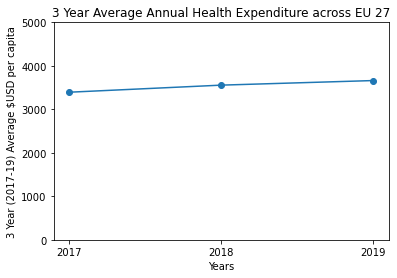

In [996]:
plt.plot(HealthExp_df25.index, (HealthExp_df25.values) / 27, marker="o")
plt.xlabel("Years")
plt.ylabel("3 Year (2017-19) Average $USD per capita")
plt.ylim(0, 5000)
plt.title("3 Year Average Annual Health Expenditure across EU 27")
plt.show()

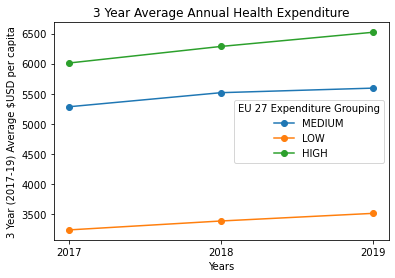

In [1010]:
plt.plot(HealthExp_df27.index, (HealthExp_df27.values) / 7, marker="o")
plt.plot(HealthExp_df29.index, (HealthExp_df29.values) / 13, marker="o")
plt.plot(HealthExp_df31.index, (HealthExp_df29.values) / 7, marker="o")
plt.legend(["MEDIUM", "LOW", "HIGH"], title= "EU 27 Expenditure Grouping")
plt.xlabel("Years")
plt.ylabel("3 Year (2017-19) Average $USD per capita")
plt.title("3 Year Average Annual Health Expenditure")
plt.show()

[Text(0.5, 1.0, '3 Year (2017-19) Average Annual Health Expenditure')]

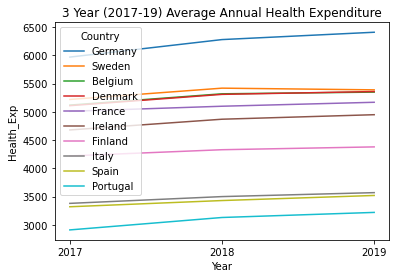

In [1009]:
sns.lineplot(data=HealthExp_df24b, x="Year", y="Health_Exp", hue="Country").set(title="3 Year (2017-19) Average Annual Health Expenditure")

Text(0.5, 1.0, 'Increase in Annual Health Expenditure: 2017 to 2019')

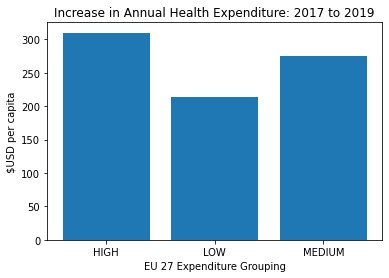

In [1040]:
plt.bar(HealthExp_df33.index, HealthExp_df33.values)
plt.xlabel("EU 27 Expenditure Grouping")
plt.ylabel("$USD per capita")
plt.title("Increase in Annual Health Expenditure: 2017 to 2019")

Text(0.5, 1.0, 'Percentage Increase in Annual Health Expenditure: 2017 to 2019')

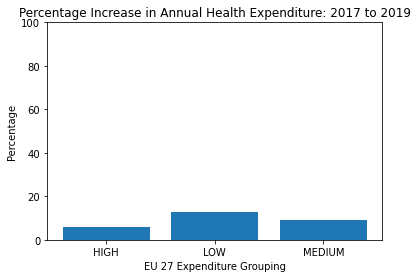

In [1039]:
plt.bar(HealthExp_df34.index, HealthExp_df34.values)
plt.xlabel("EU 27 Expenditure Grouping")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.title("Percentage Increase in Annual Health Expenditure: 2017 to 2019")

5-e) Visualisations: Health Expenditure Data - Insight 2

<AxesSubplot:title={'center':'2017-19 Annual Health Expenditure in EU 27'}, xlabel='Country', ylabel='$USD per capita'>

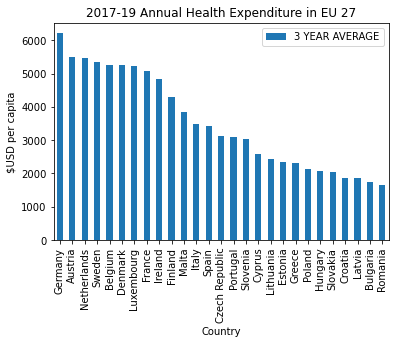

In [1021]:
HealthExp_df23.plot("Country", "3 YEAR AVERAGE", kind= "bar", title="2017-19 Annual Health Expenditure in EU 27", ylabel="$USD per capita")

<AxesSubplot:title={'center':'Increase in Annual Health Expenditure: 2017 to 19'}, xlabel='Country', ylabel='$USD per capita'>

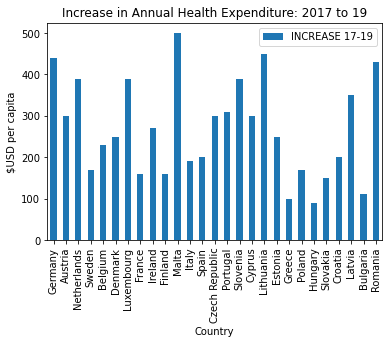

In [1038]:
HealthExp_df23.plot("Country", "INCREASE 17-19", kind= "bar", title="Increase in Annual Health Expenditure: 2017 to 19", ylabel="$USD per capita")

<AxesSubplot:title={'center':'Annual Health Expenditure: Highest & Lowest in EU 27'}, xlabel='Country', ylabel='$USD per capita'>

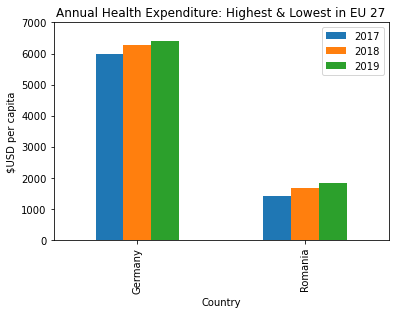

In [1029]:
HealthExp_df35.plot("Country", ["2017", "2018", "2019"], kind= "bar",  title="Annual Health Expenditure: Highest & Lowest in EU 27", ylabel="$USD per capita", ylim=[0,7000])

<AxesSubplot:title={'center':'Percentage Increase in Annual Health Expenditure: 2017 to 19'}, xlabel='Country', ylabel='Percentage'>

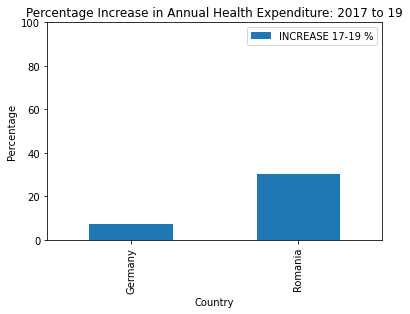

In [1037]:
HealthExp_df35.plot("Country", "INCREASE 17-19 %", kind= "bar", title="Percentage Increase in Annual Health Expenditure: 2017 to 19", ylabel="Percentage", ylim=[0,100])

[Text(0.5, 1.0, 'Average Annual Health Expenditure (2017-19) across EU 27')]

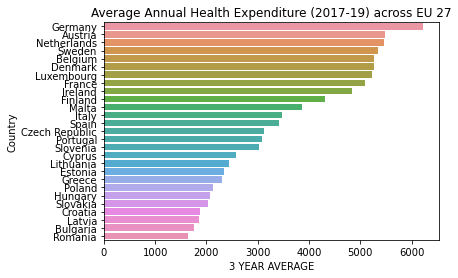

In [1033]:
sns.barplot(y=HealthExp_df23["Country"], x=HealthExp_df23["3 YEAR AVERAGE"]).set(title="Average Annual Health Expenditure (2017-19) across EU 27")

[Text(0.5, 1.0, 'Percentage Increase in Annual Health Expenditure (2017 to 2019) across EU 27')]

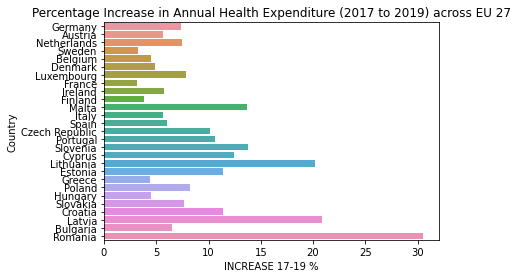

In [1036]:
sns.barplot(y=HealthExp_df23["Country"], x=HealthExp_df23["INCREASE 17-19 %"]).set(title="Percentage Increase in Annual Health Expenditure (2017 to 2019) across EU 27")

<AxesSubplot:title={'center':'Percentage of 2019 Health Expenditure by EU 27 Expenditure Grouping '}, ylabel='2019'>

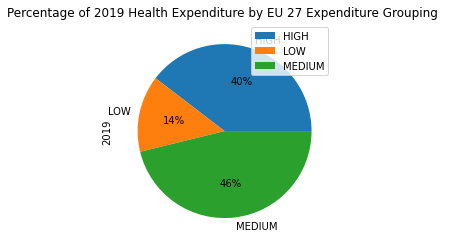

In [1044]:
HealthExp_df23.groupby("LEVEL").sum().plot(kind= "pie", y= "2019", autopct='%1.0f%%', title="Percentage of 2019 Health Expenditure by EU 27 Expenditure Grouping ") 

<AxesSubplot:title={'center':'Percentage of EU 27 Countries in each EU 27 Expenditure Grouping '}, ylabel='Country'>

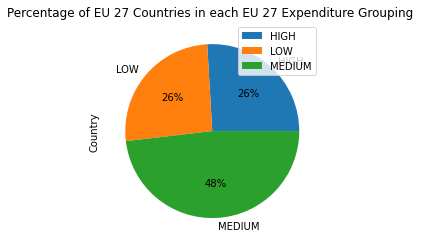

In [1045]:
HealthExp_df23.groupby("LEVEL").count().plot(kind= "pie", y= "Country", autopct='%1.0f%%', title="Percentage of EU 27 Countries in each EU 27 Expenditure Grouping ")

5-f) Visualisations: Covid-19 Data - Insight 3

[Text(0.5, 1.0, 'Cases of Covid-19 across the EU 27 (up to 23rd Jan 2023)')]

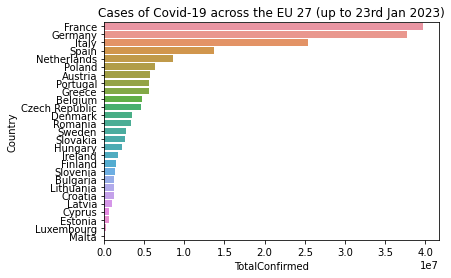

In [1049]:
sns.barplot(x = Covid19_df12["TotalConfirmed"], y = Covid19_df12["Country"]).set(title="Cases of Covid-19 across the EU 27 (up to 23rd Jan 2023)")

Text(0.5, 1.0, 'Deaths due to Covid-19 across the EU 27 (up to 23rd Jan 2023)')

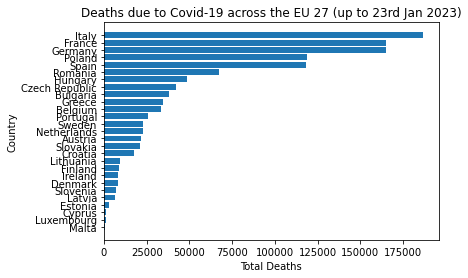

In [1050]:
plt.barh(Covid19_df13["Country"], Covid19_df13["TotalDeaths"])
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.title("Deaths due to Covid-19 across the EU 27 (up to 23rd Jan 2023)")

Text(0.5, 1.0, 'Size of Population with Cases of Covid-19 across the EU 27 (up to 23rd Jan 2023)')

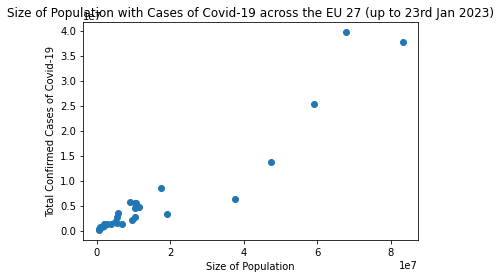

In [1055]:
plt.scatter(Covid19_df11["2022 Pop"], Covid19_df11["TotalConfirmed"])
plt.xlabel("Size of Population")
plt.ylabel("Total Confirmed Cases of Covid-19")
plt.title("Size of Population with Cases of Covid-19 across the EU 27 (up to 23rd Jan 2023)")

[Text(0.5, 1.0, 'Cases of Covid-19 & Deaths across the EU 27 (up to 23rd Jan 2023)')]

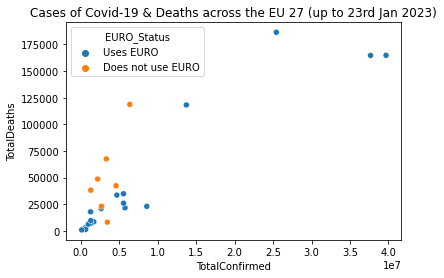

In [1056]:
sns.scatterplot(x= Covid19_df11["TotalConfirmed"], y= Covid19_df11["TotalDeaths"], hue= Covid19_df11["EURO_Status"]).set(title="Cases of Covid-19 & Deaths across the EU 27 (up to 23rd Jan 2023)")

[Text(0.5, 1.0, 'Cases of Covid-19 per 10,000 population across the EU 27 (up to 23rd Jan 2023)')]

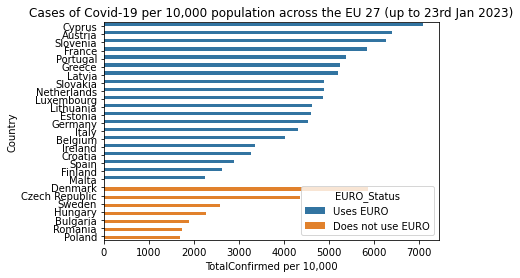

In [1058]:
sns.barplot(data=Covid19_df14, y= "Country", x="TotalConfirmed per 10,000", hue="EURO_Status").set(title="Cases of Covid-19 per 10,000 population across the EU 27 (up to 23rd Jan 2023)")

[Text(0.5, 1.0, 'Deaths due to Covid-19 per 10,000 population across the EU 27 (up to 23rd Jan 2023)')]

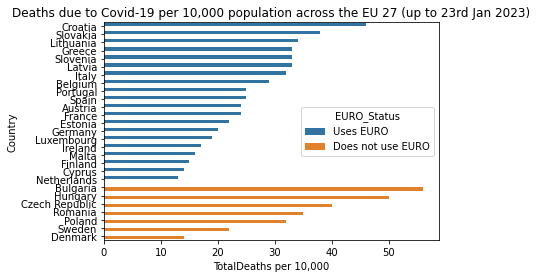

In [1059]:
sns.barplot(data=Covid19_df15, y= "Country", x="TotalDeaths per 10,000", hue="EURO_Status").set(title="Deaths due to Covid-19 per 10,000 population across the EU 27 (up to 23rd Jan 2023)")

5-g) Visualisations: Covid-19 Data - Insight 4

Text(0.5, 1.0, 'EU 27 countries which have 8 different levels of Covid-19 Cases per 10,000 pop (up to 23rd Jan 2023)')

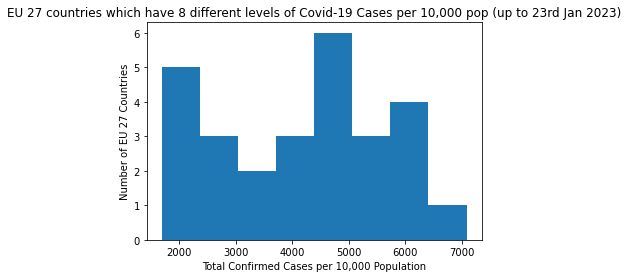

In [1061]:
plt.hist(x=Covid19_df11["TotalConfirmed per 10,000"], bins = 8)
plt.xlabel("Total Confirmed Cases per 10,000 Population")
plt.ylabel("Number of EU 27 Countries")
plt.title("EU 27 countries which have 8 different levels of Covid-19 Cases per 10,000 pop (up to 23rd Jan 2023)")

Text(0.5, 1.0, 'EU 27 countries which have 3 different levels of Deaths due to Covid-19 per 10,000 pop (up to 23rd Jan 2023)')

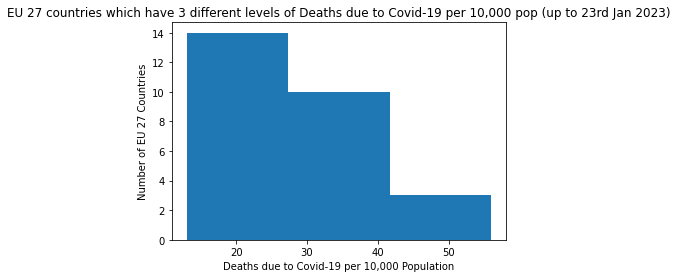

In [1064]:
plt.hist(x=Covid19_df11["TotalDeaths per 10,000"], bins = 3)
plt.xlabel("Deaths due to Covid-19 per 10,000 Population")
plt.ylabel("Number of EU 27 Countries")
plt.title("EU 27 countries which have 3 different levels of Deaths due to Covid-19 per 10,000 pop (up to 23rd Jan 2023)")

Text(0.5, 1.0, 'Interquartile Range & Median of Covid-19 cases across the EU 27 (up to 23rd Jan 2023)')

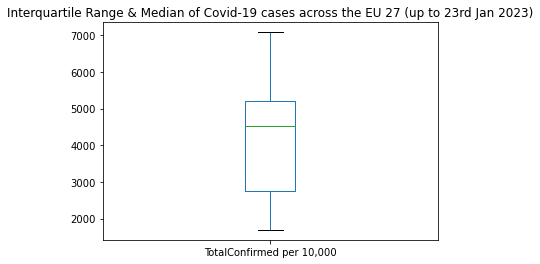

In [1065]:
Covid19_df11.plot("Country", "TotalConfirmed per 10,000", kind= "box")
plt.title("Interquartile Range & Median of Covid-19 cases across the EU 27 (up to 23rd Jan 2023)")

Text(0.5, 1.0, 'Interquartile Range & Median of Deaths due to Covid-19 across the EU 27 (up to 23rd Jan 2023)')

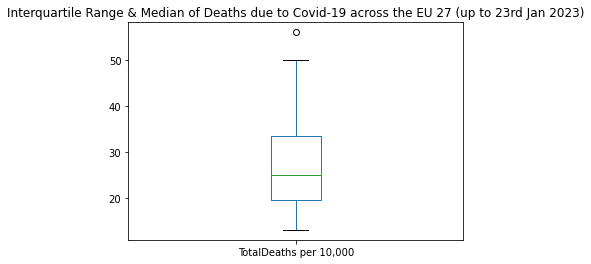

In [1066]:
Covid19_df11.plot("Country", "TotalDeaths per 10,000", kind= "box")
plt.title("Interquartile Range & Median of Deaths due to Covid-19 across the EU 27 (up to 23rd Jan 2023)")

5-h) Visualisations: Covid-19 Data - Insight 5

[Text(0.5, 1.0, 'RATIO: Number of Covid-19 Cases (per 10,000 population) per unit of Health Expenditure (3 year average GDP per capita)')]

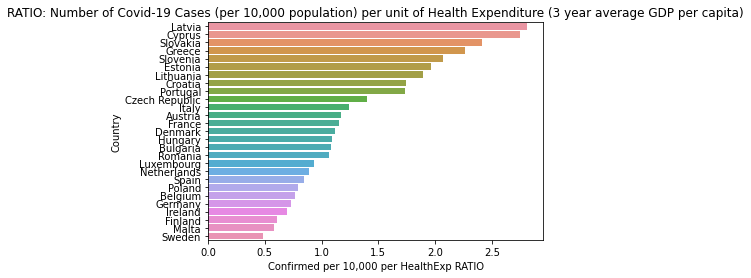

In [1078]:
sns.barplot(x= ALL_df2["Confirmed per 10,000 per HealthExp RATIO"], y= ALL_df2["Country"]).set(title="RATIO: Number of Covid-19 Cases (per 10,000 population) per unit of Health Expenditure (3 year average GDP per capita)")

[Text(0.5, 1.0, 'RATIO: Number of Deaths due to Covid-19 (per 10,000 population) per unit of Health Expenditure (3 year average GDP per capita)')]

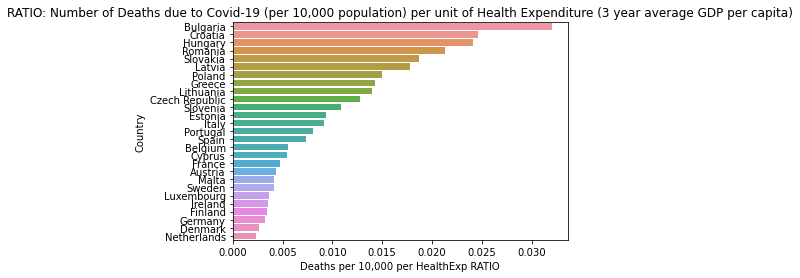

In [1077]:
sns.barplot(x= ALL_df3["Deaths per 10,000 per HealthExp RATIO"], y= ALL_df3["Country"]).set(title="RATIO: Number of Deaths due to Covid-19 (per 10,000 population) per unit of Health Expenditure (3 year average GDP per capita)")

[Text(0.5, 1.0, '3 Year Average Health Expenditure per capita (2017-19) & Cases (per 10,000 population) of Covid-19 across the EU 27 (up to 23rd Jan 2023)')]

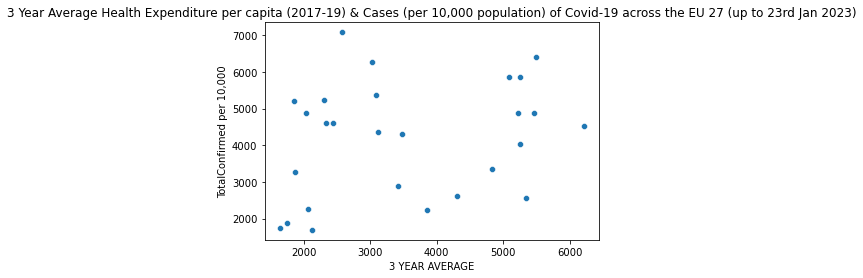

In [1075]:
sns.scatterplot(data=ALL_df1, x='3 YEAR AVERAGE',y='TotalConfirmed per 10,000').set(title="3 Year Average Health Expenditure per capita (2017-19) & Cases (per 10,000 population) of Covid-19 across the EU 27 (up to 23rd Jan 2023)")

[Text(0.5, 1.0, '3 Year Average Health Expenditure per capita (2017-19) & Deaths (per 10,000 of population) due to Covid-19 across the EU 27 (up to 23rd Jan 2023)')]

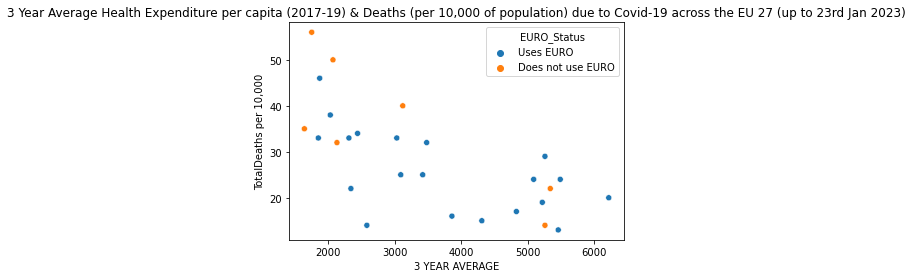

In [1076]:
sns.scatterplot(data=ALL_df1, x='3 YEAR AVERAGE',y='TotalDeaths per 10,000', hue="EURO_Status").set(title="3 Year Average Health Expenditure per capita (2017-19) & Deaths (per 10,000 of population) due to Covid-19 across the EU 27 (up to 23rd Jan 2023)")